## MACS30150 PS9
### Dr. Richard Evans
### Submitted by Junho Choi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Question 1-(a)

Before creating the scatterplot and determining which model is the best, let us read in the data.

In [2]:
drink = pd.read_csv('strongdrink.txt')
cultivar_uniques = list(drink.cultivar.unique())

Below code chunk will produce the scatterplot we are required to show, with alcohol (or `alco` variable) on the x-axis and color intensity (or `color_int` variable) on the y-axis. The data is divided into three subsets depending on the value of `cultivar`, which has three unique values to it.

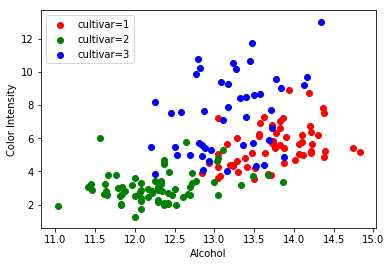

In [3]:
colors = ['r', 'g', 'b']
for i, val in enumerate(cultivar_uniques):
    subset = drink.loc[drink['cultivar']==val, :]
    subset_x = subset['alco']
    subset_y = subset['color_int']
    
    plt.scatter(x=subset_x, y=subset_y,
                color=colors[i], label="cultivar={}".format(val))

plt.ylabel('Color Intensity')
plt.xlabel('Alcohol')
plt.legend()
plt.show()

### Question 1-(b)

Let us define the regressors (or `xvals` below) and the dependent variable (or `yvals` below) with the following code chunk.

In [4]:
xvals_columns = ['alco', 'malic', 'tot_phen', 'color_int']
xvals = drink[xvals_columns].values
yvals = drink['cultivar'].values

Because the logistic regression function from Scikit-Learn also uses a `random_state` parameter, let us initialize it to be $25$ as the question asks. Also, we define the dictionary `param_dist1` to be used for hyperparameter tuning.

In [5]:
LR = LogisticRegression(random_state=25)

param_dist1 = {
    'penalty': ['l1', 'l2'],
    'C': sp_uniform(0.1, 10.0)
}

In the below code chunk, I have define a function called `opt_model` (for "optimization of model") that takes in the aforementioned `xvals`, `yvals`, which model to be used, the dictionary containing information about the range of hyperparameters, `randomness` to be used for setting the `random_state`, and `predict` for determining whether to return the predicted classification as well. I have set `n_iter`, `n_jobs`, and `cv` as $200$, $-1$, and $5$ respectively.

In [6]:
def opt_model(xvals, yvals, model, search_dict, randomness, predict=False):

    random_search = \
        RandomizedSearchCV(model, param_distributions=search_dict,
                           n_iter=200, n_jobs=-1, cv=5,
                           random_state=randomness,
                           scoring='neg_mean_squared_error')
    
    random_search.fit(xvals, yvals)
    return_vars = [random_search.best_params_,
                   -random_search.best_score_]
    
    
    if predict == True:
        pred_yvals = random_search.fit(xvals, yvals)
        return_vars.append(pred_yvals)

    return return_vars

Based on this function, for the logistic regression, the best (hyper)parameters are `C` of approximately $2.6659$ and $l1$ penalty. The MSE of optimal result is shown to be approximately $0.1193$.

In [7]:
LR_param, LR_score = opt_model(xvals, yvals, LR, param_dist1, 25)
print("Best parameters are: {}".format(LR_param))
print("Best score (MSE) is: {}".format(LR_score))

Best parameters are: {'C': 2.665871587495725, 'penalty': 'l1'}
Best score (MSE) is: 0.11931818181818182


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Question 1-(c)

Now we do the similar for random forest classifier. The random forest classifier function from Scikit-Learn also takes in a `random_state` parameter, so let us set it to be $25$ once again. In addition, let us define `param_dict2` to be used for hyperparameter tuning.

In [8]:
rfclassifier = RandomForestClassifier(random_state=25)

param_dist2 = {
    'n_estimators':sp_randint(10, 200),
    'max_depth': sp_randint(2, 4),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(2, 20),
    'max_features': sp_randint(1, 4)
}

Using the previously defined `opt_model` function, let us plug in the random forest classifier and the above dictionary into this function. The best (hyper)parameters are found to be `max_depth` of 3, `max_features` of 1, `min_samples_leaf` of 13, `min_samples_split` of 18, and finally `n_estimators` of 176. The optimal MSE value is found to be approximately $0.1307$.

In [9]:
rfc_param, rfc_score = opt_model(xvals, yvals, rfclassifier, param_dist2, 25)
print("Best parameters are: {}".format(rfc_param))
print("Best score (MSE) is: {}".format(rfc_score))

Best parameters are: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
Best score (MSE) is: 0.13068181818181818


### Question 1-(d)

Again, let us do the similar for the support vector machine classifier; note that the SVM classifier function does not take a `random_state` parameter. We set the kernel to be radial basis function. In addition, let us set up the dictionray `param_dist3` for hyperparameter tuning once again.

In [10]:
svclassifier = SVC(kernel='rbf')

param_dist3 = {
    'C': sp_uniform(loc=0.1, scale=10.0),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]
}

Using the previously defined `opt_model` function, let us plug in the SVM classifier and the above dictionary into this function. The best (hyper)parameters are found to be `C` of approximately $3.3605$, `gamma` of `scale`, and `shrinking` of `True`. The optimal MSE value is found to be approximately $0.1477$.

In [11]:
svc_param, svc_score = opt_model(xvals, yvals, svclassifier, param_dist3, 25)
print("Best parameters are: {}".format(svc_param))
print("Best score (MSE) is: {}".format(svc_score))

Best parameters are: {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
Best score (MSE) is: 0.14772727272727273


### Question 1-(e)

Again, let us do the similar for the multilayer perceptron (MLP) classifier; MLP classifier function provided by Scikit-Learn takes in a `random_state` parameter, so let us set it to be $25$. In addition, let us set up the dictionray `param_dist4` for hyperparameter tuning once again.

In [12]:
multilayerper = MLPClassifier(random_state=25)

param_dist4 = {
    'hidden_layer_sizes': sp_randint(1, 100),
    'activation': ['logistic', 'relu'],
    'alpha': sp_uniform(0.1, 10.0)
}

Once again, using the previously defined `opt_model` function, let us plug in the MLP classifier and the above dictionary into this function. The best (hyper)parameters are found to be `activation` of `relu`, `alpha` of approximately `2.1589`, and `hidden_layer_sizes` of 68. The optimal MSE value is found to be approximately $0.1932$.

In [13]:
mlp_param, mlp_score = opt_model(xvals, yvals, multilayerper, param_dist4, 25)
print("Best parameters are: {}".format(mlp_param))
print("Best score (MSE) is: {}".format(mlp_score))

Best parameters are: {'activation': 'relu', 'alpha': 2.158912119744818, 'hidden_layer_sizes': 68}
Best score (MSE) is: 0.19318181818181818


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Question 1-(f)

I define the function `model_comparisons` below to automatize the processes above and find the best model (in terms of minimized MSE). This function will return the best model, best parameters for the model, and the optimized MSE.

In [14]:
def model_comparisons(list_of_models, list_of_dictionaries,
                      xvals, yvals, randomness=25):
    
    contender = 0
    contender_mse = float('inf')
    contender_param = 0
    for i, model in enumerate(list_of_models):
        dict_to_use = list_of_dictionaries[i]
        param, score = opt_model(xvals, yvals, model,
                                 dict_to_use, randomness)
        if contender_mse > score:
            contender = model
            contender_mse = score
            contender_param = param
    
    return contender, contender_param, contender_mse

List of models and list of dictionaries to be used in the function are defined as follows.

In [15]:
list_of_models = [LR, rfclassifier, svclassifier, multilayerper]
list_of_dictionaries = [param_dist1, param_dist2, param_dist3, param_dist4]

According to the comparison (or "horse race") of models, it is shown that the (multinomial) __logistic regression__ is the best (in terms of minimized MSE) given the hyperparameters being `C` of approximately $2.6659$ and $l1$ penalty.

In [16]:
bestmodel, bestparam, bestmse = \
    model_comparisons(list_of_models, list_of_dictionaries,
                      xvals, yvals)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
print(bestmodel)
print(bestparam)
print(bestmse)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=25, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'C': 2.665871587495725, 'penalty': 'l1'}
0.11931818181818182
